In [1]:
from datasets import load_dataset, DownloadMode

# First, download the dataset with caching
def download_starcoderdata_csharp(save_directory, split="train", download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS):
    try:
        ds = load_dataset(
            "bigcode/starcoderdata",
            data_dir="c-sharp",
            split=split,
            cache_dir=save_directory,
            download_mode=download_mode,
        )

        # Save the dataset properly for later reloading
        output_path = f"{save_directory}/csharp_{split}_dataset"
        ds.save_to_disk(output_path)

        print(f"Dataset 'bigcode/starcoderdata' (C-SHARP, {split}) successfully downloaded and saved to '{output_path}'.")
        return ds

    except Exception as e:
        print(f"Error downloading dataset 'bigcode/starcoderdata' (C-SHARP, {split}): {e}")
        return None

In [2]:
ds = download_starcoderdata_csharp(save_directory="./", split="train")

Resolving data files:   0%|          | 0/45 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/93 [00:00<?, ?it/s]

Saving the dataset (0/93 shards):   0%|          | 0/10801285 [00:00<?, ? examples/s]

Dataset 'bigcode/starcoderdata' (C-SHARP, train) successfully downloaded and saved to './/csharp_train_dataset'.


In [3]:
from datasets import load_from_disk

# Later, load the dataset from the saved location
dataset = load_from_disk("./csharp_train_dataset")

Loading dataset from disk:   0%|          | 0/93 [00:00<?, ?it/s]

In [4]:
dataset

Dataset({
    features: ['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id', 'content'],
    num_rows: 10801285
})

In [5]:
type(dataset)

datasets.arrow_dataset.Dataset

In [6]:
dataset = dataset.sort(
    column_names=['max_stars_count', 'max_stars_repo_name'],
    reverse=[True, False]
)

In [7]:
print(dataset[0])

{'max_stars_repo_path': 'extensions/vscode-colorize-tests/test/colorize-fixtures/test.cshtml', 'max_stars_repo_name': 'sbj42/vscode', 'max_stars_count': 82043.0, 'id': '331824', 'content': '@{\n    var total = 0;\n    var totalMessage = "";\n    @* a multiline\n      razor comment embedded in csharp *@\n    if (IsPost) {\n\n        // Retrieve the numbers that the user entered.\n        var num1 = Request["text1"];\n        var num2 = Request["text2"];\n\n        // Convert the entered strings into integers numbers and add.\n        total = num1.AsInt() + num2.AsInt();\n\t\t<italic><bold>totalMessage = "Total = " + total;</bold></italic>\n    }\n}\n\n<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <title>Add Numbers</title>\n    <meta charset="utf-8" />\n  </head>\n<body>\n  <p>Enter two whole numbers and then click <strong>Add</strong>.</p>\n  <form action="" method="post">\n    <p><label for="text1">First Number:</label>\n      <input type="text" name="text1" />\n    </p>\n    <p><l

In [8]:
# Print the first 10 examples
for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print("\n")
    else:
        break

Example 0:
@{
    var total = 0;
    var totalMessage = "";
    @* a multiline
      razor comment embedded in csharp *@
    if (IsPost) {

        // Retrieve the numbers that the user entered.
        var num1 = Request["text1"];
        var num2 = Request["text2"];

        // Convert the entered strings into integers numbers and add.
        total = num1.AsInt() + num2.AsInt();
		<italic><bold>totalMessage = "Total = " + total;</bold></italic>
    }
}

<!DOCTYPE html>
<html lang="en">
  <head>
    <title>Add Numbers</title>
    <meta charset="utf-8" />
  </head>
<body>
  <p>Enter two whole numbers and then click <strong>Add</strong>.</p>
  <form action="" method="post">
    <p><label for="text1">First Number:</label>
      <input type="text" name="text1" />
    </p>
    <p><label for="text2">Second Number:</label>
      <input type="text" name="text2" />
    </p>
    <p><input type="submit" value="Add" /></p>
  </form>

	@* now we call the totalMessage method
	   (a multi line razo

In [9]:
from datasets import Dataset

def calculate_avg_line_length(example):
    lines = example['content'].split('\n')
    avg_length = sum(len(line) for line in lines) / len(lines)
    example['avg_line_length'] = avg_length
    return example

dataset = dataset.map(calculate_avg_line_length)

for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print(f"Average Line Length: {example['avg_line_length']}\n")
    else:
        break

Map:   0%|          | 0/10801285 [00:00<?, ? examples/s]

Example 0:
@{
    var total = 0;
    var totalMessage = "";
    @* a multiline
      razor comment embedded in csharp *@
    if (IsPost) {

        // Retrieve the numbers that the user entered.
        var num1 = Request["text1"];
        var num2 = Request["text2"];

        // Convert the entered strings into integers numbers and add.
        total = num1.AsInt() + num2.AsInt();
		<italic><bold>totalMessage = "Total = " + total;</bold></italic>
    }
}

<!DOCTYPE html>
<html lang="en">
  <head>
    <title>Add Numbers</title>
    <meta charset="utf-8" />
  </head>
<body>
  <p>Enter two whole numbers and then click <strong>Add</strong>.</p>
  <form action="" method="post">
    <p><label for="text1">First Number:</label>
      <input type="text" name="text1" />
    </p>
    <p><label for="text2">Second Number:</label>
      <input type="text" name="text2" />
    </p>
    <p><input type="submit" value="Add" /></p>
  </form>

	@* now we call the totalMessage method
	   (a multi line razo

In [10]:
# Get the first 5 million entries from the dataset
sliced_dataset = dataset[:2500000]

In [11]:
del dataset

In [12]:
import pandas as pd

df = pd.DataFrame(sliced_dataset)

In [13]:
avg_line_length_stats = df['avg_line_length'].describe()
print("Statistics for avg_line_length:")
print(avg_line_length_stats)

Statistics for avg_line_length:
count    2.500000e+06
mean     3.078232e+01
std      9.335997e+00
min      1.600000e+00
25%      2.448000e+01
50%      3.002273e+01
75%      3.594022e+01
max      1.510000e+02
Name: avg_line_length, dtype: float64


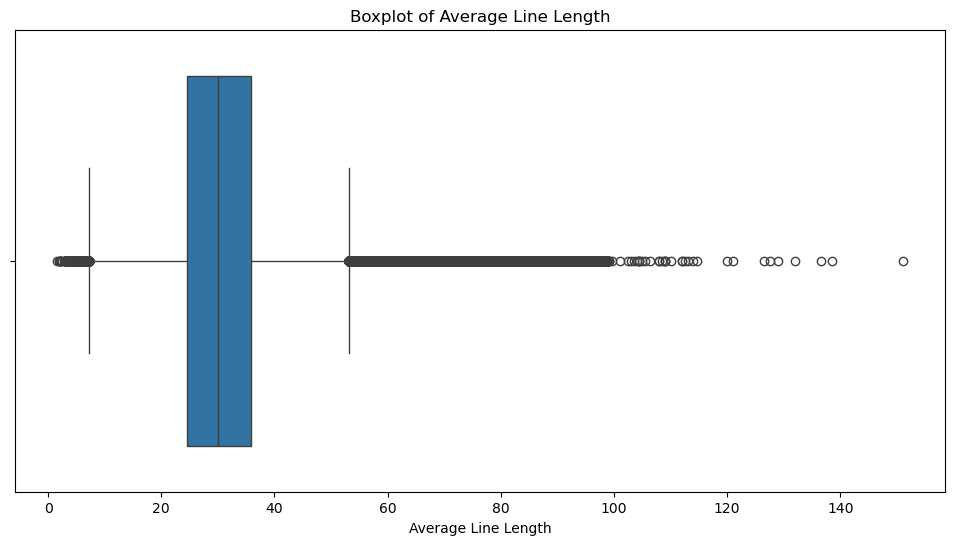

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['avg_line_length'])
plt.title('Boxplot of Average Line Length')
plt.xlabel('Average Line Length')
plt.show()

In [15]:
Q1 = df['avg_line_length'].quantile(0.25)
Q3 = df['avg_line_length'].quantile(0.75)
IQR = Q3 - Q1


In [16]:
outliers = df[(df['avg_line_length'] < (Q1 - 1.5 * IQR)) | (df['avg_line_length'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 50689


In [17]:
outliers['avg_line_length'].describe()

count    50689.000000
mean        61.455299
std         10.937518
min          1.600000
25%         55.303797
50%         58.676829
75%         65.352941
max        151.000000
Name: avg_line_length, dtype: float64

In [18]:
df.drop(outliers.index, inplace=True)

In [19]:
df['avg_line_length'].describe()

count    2.449311e+06
mean     3.014753e+01
std      8.161818e+00
min      7.291667e+00
25%      2.436000e+01
50%      2.981250e+01
75%      3.551448e+01
max      5.313043e+01
Name: avg_line_length, dtype: float64

In [20]:
import numpy as np

np.percentile(df['avg_line_length'], 80)

36.98717948717949

In [21]:
df['line_count'] = df['content'].apply(lambda x: len(x.split('\n')))
df['line_count'].describe()

count    2.449311e+06
mean     1.171869e+02
std      3.610455e+02
min      1.000000e+00
25%      2.500000e+01
50%      5.100000e+01
75%      1.130000e+02
max      8.881900e+04
Name: line_count, dtype: float64

In [22]:
count_range_dict = {
    "0-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0,
    "501-600": 0,
    "601-700": 0,
    "701-800": 0,
    "801-900": 0,
    "901-1000": 0,
    "1000+": 0
}

for count in df['line_count']:
    if count <= 100:
        count_range_dict["0-100"] += 1
    elif count <= 200:
        count_range_dict["101-200"] += 1
    elif count <= 300:
        count_range_dict["201-300"] += 1
    elif count <= 400:
        count_range_dict["301-400"] += 1
    elif count <= 500:
        count_range_dict["401-500"] += 1
    elif count <= 600:
        count_range_dict["501-600"] += 1
    elif count <= 700:
        count_range_dict["601-700"] += 1
    elif count <= 800:
        count_range_dict["701-800"] += 1
    elif count <= 900:
        count_range_dict["801-900"] += 1
    elif count <= 1000:
        count_range_dict["901-1000"] += 1
    else:
        count_range_dict["1000+"] += 1

In [23]:
for key, value in count_range_dict.items():
    print(f"Number of examples with line count in range {key}: {value}")

Number of examples with line count in range 0-100: 1760940
Number of examples with line count in range 101-200: 374789
Number of examples with line count in range 201-300: 133384
Number of examples with line count in range 301-400: 63169
Number of examples with line count in range 401-500: 34912
Number of examples with line count in range 501-600: 21074
Number of examples with line count in range 601-700: 13881
Number of examples with line count in range 701-800: 9768
Number of examples with line count in range 801-900: 7219
Number of examples with line count in range 901-1000: 5198
Number of examples with line count in range 1000+: 24977


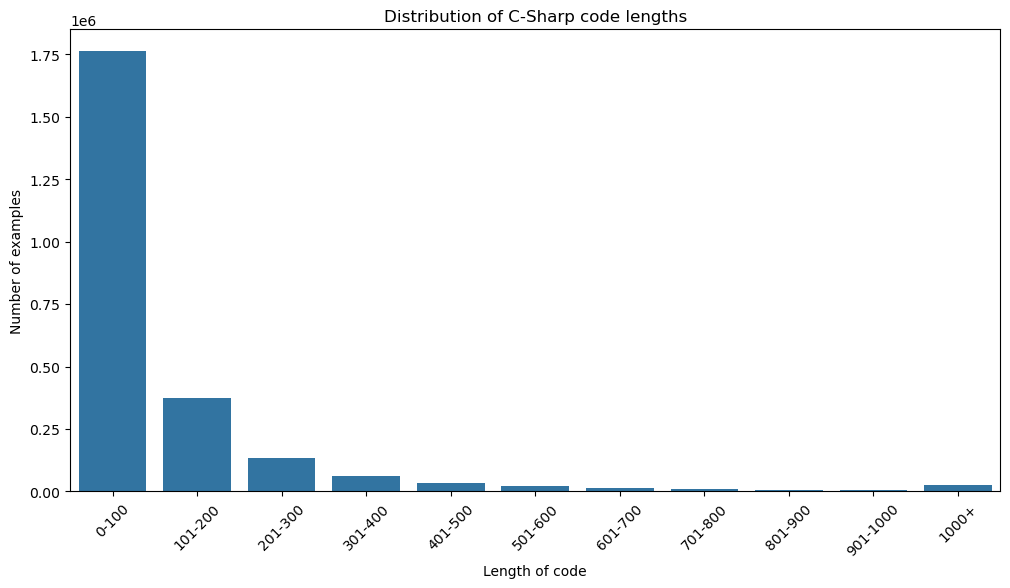

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_range_dict.keys()), y=list(count_range_dict.values()))
plt.title("Distribution of C-Sharp code lengths")
plt.xlabel("Length of code")
plt.ylabel("Number of examples")
plt.xticks(rotation=45)
plt.show()

In [25]:
df_line = pd.DataFrame(list(count_range_dict.items()), columns=["Length", "Count"])
df_line["Cumulative Count"] = df_line["Count"].cumsum()
df_line["Percentage"] = df_line["Count"] / df_line["Count"].sum() * 100
df_line["Cumulative Percentage"] = df_line["Percentage"].cumsum()
df_line.head(11)

,Length,Count,Cumulative Count,Percentage,Cumulative Percentage
0,0-100,1760940,1760940,71.895321,71.895321
1,101-200,374789,2135729,15.301813,87.197134
2,201-300,133384,2269113,5.445776,92.642911
3,301-400,63169,2332282,2.579052,95.221962
4,401-500,34912,2367194,1.425380,96.647343
5,501-600,21074,2388268,0.860405,97.507748
6,601-700,13881,2402149,0.566731,98.074479
7,701-800,9768,2411917,0.398806,98.473285
8,801-900,7219,2419136,0.294736,98.768021
9,901-1000,5198,2424334,0.212223,98.980244


In [26]:
np.percentile(df['line_count'], 90)

242.0

In [27]:
df.columns

Index(['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id',
       'content', 'avg_line_length', 'line_count'],
      dtype='object')

In [28]:
df_filtered = df.drop(columns=['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id'], axis=1)
df_filtered.head()

,content,avg_line_length,line_count
0,@{\n var total = 0;\n var totalMessage =...,23.869565,46
1,<filename>extensions/vscode-colorize-tests/tes...,26.034483,29
2,﻿// Copyright (c) Microsoft Corporation\r\n// ...,50.296296,27
3,﻿// Copyright (c) Microsoft Corporation\r\n// ...,29.545455,66
4,<reponame>RyanCorrigal/PowerToys\n﻿// Copyrigh...,32.823529,34


In [29]:
df_filtered.shape

(2449311, 3)

In [30]:
df_filtered = df_filtered[df_filtered['line_count'] <= 250]
df_filtered.shape

(2216076, 3)

In [31]:
df_filtered = df_filtered[df_filtered['avg_line_length'] <= 37]
df_filtered.shape

(1830227, 3)

In [32]:
df_filtered.head()

,content,avg_line_length,line_count
0,@{\n var total = 0;\n var totalMessage =...,23.869565,46
1,<filename>extensions/vscode-colorize-tests/tes...,26.034483,29
3,﻿// Copyright (c) Microsoft Corporation\r\n// ...,29.545455,66
4,<reponame>RyanCorrigal/PowerToys\n﻿// Copyrigh...,32.823529,34
5,﻿// Copyright (c) Microsoft Corporation\r\n// ...,27.473684,38


In [33]:
print(df[["avg_line_length", "line_count"]].describe())
print()
print(df_filtered.describe())

       avg_line_length    line_count
count     2.449311e+06  2.449311e+06
mean      3.014753e+01  1.171869e+02
std       8.161818e+00  3.610455e+02
min       7.291667e+00  1.000000e+00
25%       2.436000e+01  2.500000e+01
50%       2.981250e+01  5.100000e+01
75%       3.551448e+01  1.130000e+02
max       5.313043e+01  8.881900e+04

       avg_line_length    line_count
count     1.830227e+06  1.830227e+06
mean      2.692563e+01  5.732338e+01
std       5.930007e+00  5.110961e+01
min       7.291667e+00  1.000000e+00
25%       2.280000e+01  2.100000e+01
50%       2.740323e+01  3.900000e+01
75%       3.163158e+01  7.600000e+01
max       3.700000e+01  2.500000e+02


In [34]:
data_dict_csharp = {}

for i, example in enumerate(df_filtered["content"]):
    data_dict_csharp[f"csharp_{i}"] = example

In [35]:
assert len(data_dict_csharp) == len(df_filtered), "Data dictionary length does not match the number of examples in the dataset."

In [36]:
for i, (k,v) in enumerate(data_dict_csharp.items()):
    if i < 5:
        print(f"Example {k}:")
        print(v)
        print("\n")
    else:
        break

Example csharp_0:
@{
    var total = 0;
    var totalMessage = "";
    @* a multiline
      razor comment embedded in csharp *@
    if (IsPost) {

        // Retrieve the numbers that the user entered.
        var num1 = Request["text1"];
        var num2 = Request["text2"];

        // Convert the entered strings into integers numbers and add.
        total = num1.AsInt() + num2.AsInt();
		<italic><bold>totalMessage = "Total = " + total;</bold></italic>
    }
}

<!DOCTYPE html>
<html lang="en">
  <head>
    <title>Add Numbers</title>
    <meta charset="utf-8" />
  </head>
<body>
  <p>Enter two whole numbers and then click <strong>Add</strong>.</p>
  <form action="" method="post">
    <p><label for="text1">First Number:</label>
      <input type="text" name="text1" />
    </p>
    <p><label for="text2">Second Number:</label>
      <input type="text" name="text2" />
    </p>
    <p><input type="submit" value="Add" /></p>
  </form>

	@* now we call the totalMessage method
	   (a multi li

In [37]:
import json

with open('csharp_train.json', 'w') as f:
    json.dump(data_dict_csharp, f)
    print("Saved to 'csharp_train.json'")

Saved to 'csharp_train.json'
